In [1]:
import random
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from micrograd.engine import Value
from micrograd.neuralNetwork import Neuron, Layer, MLP
from micrograd.plot import draw_dot

In [3]:
np.random.seed(1337)
random.seed(1337)

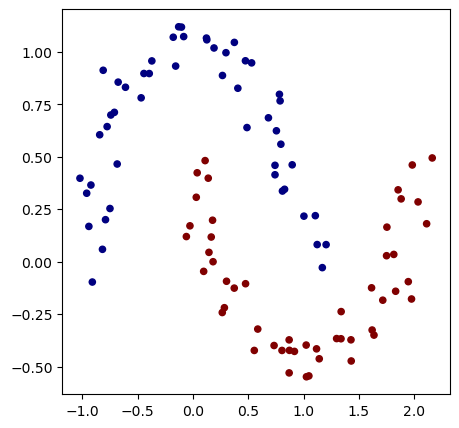

In [4]:
# make up a dataset

from sklearn.datasets import make_moons, make_blobs
X, y = make_moons(n_samples=100, noise=0.1)

y = y*2 - 1 # make y be -1 or 1
# visualize in 2D
plt.figure(figsize=(5,5))
plt.scatter(X[:,0], X[:,1], c=y, s=20, cmap='jet')

In [5]:
# initialize a model 
model = MLP(2, [16, 16, 1], "tanh") # 2-layer neural network
print(model)
print("number of parameters", len(model.parameters()))

MLP of [Layer of [Neuron(2, act=tanh), Neuron(2, act=tanh), Neuron(2, act=tanh), Neuron(2, act=tanh), Neuron(2, act=tanh), Neuron(2, act=tanh), Neuron(2, act=tanh), Neuron(2, act=tanh), Neuron(2, act=tanh), Neuron(2, act=tanh), Neuron(2, act=tanh), Neuron(2, act=tanh), Neuron(2, act=tanh), Neuron(2, act=tanh), Neuron(2, act=tanh), Neuron(2, act=tanh)], Layer of [Neuron(16, act=tanh), Neuron(16, act=tanh), Neuron(16, act=tanh), Neuron(16, act=tanh), Neuron(16, act=tanh), Neuron(16, act=tanh), Neuron(16, act=tanh), Neuron(16, act=tanh), Neuron(16, act=tanh), Neuron(16, act=tanh), Neuron(16, act=tanh), Neuron(16, act=tanh), Neuron(16, act=tanh), Neuron(16, act=tanh), Neuron(16, act=tanh), Neuron(16, act=tanh)], Layer of [Neuron(16, act=tanh)]]
number of parameters 337


In [7]:
# Testing the train function
model.train(X, y, epochs=100, patience=10, loss_type="svm")

step 0 loss 0.030738713421155153, accuracy 100.0%
step 1 loss 0.030253416964989035, accuracy 100.0%
step 2 loss 0.029796347420964868, accuracy 100.0%
step 3 loss 0.02936527266536118, accuracy 100.0%
step 4 loss 0.028958190696585093, accuracy 100.0%
step 5 loss 0.028573302948705893, accuracy 100.0%
step 6 loss 0.028209003980652764, accuracy 100.0%
step 7 loss 0.027863954296949777, accuracy 100.0%
step 8 loss 0.027537522567166982, accuracy 100.0%
step 9 loss 0.02723205393114976, accuracy 100.0%
step 10 loss 0.02696343443391693, accuracy 100.0%
step 11 loss 0.026804637856037407, accuracy 100.0%
step 12 loss 0.027094212863413805, accuracy 100.0%
step 13 loss 0.029091427418252932, accuracy 100.0%
step 14 loss 0.041296412576175806, accuracy 99.0%
step 15 loss 0.08486760872638589, accuracy 99.0%
step 16 loss 0.25743558269657063, accuracy 89.0%
step 17 loss 0.12270703429153255, accuracy 95.0%
step 18 loss 0.11505566241715673, accuracy 95.0%
step 19 loss 0.10202507687658433, accuracy 96.0%
step

(-1.548639298268643, 1.951360701731357)

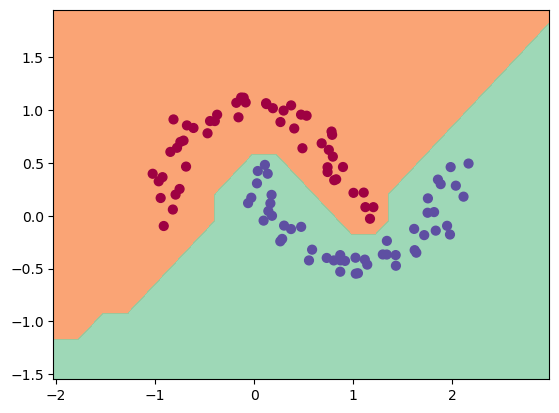

In [8]:
# visualize decision boundary

h = 0.25
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))
Xmesh = np.c_[xx.ravel(), yy.ravel()]
inputs = [list(map(Value, xrow)) for xrow in Xmesh]
scores = list(map(model, inputs))
Z = np.array([s.data > 0 for s in scores])
Z = Z.reshape(xx.shape)

fig = plt.figure()
plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral, alpha=0.8)
plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.Spectral)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())